# Assignment 9: GBDT

#### Response Coding: Example

<img src='http://i.imgur.com/TufZptV.jpg' width=700px>

> The response tabel is built only on train dataset.
> For a category which is not there in train data and present in test data, we will encode them with default values
Ex: in our test data if have State: D then we encode it as [0.5, 0.05]

<ol>
    <li><strong>Apply GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)+sentiment Score of eassay(check the bellow example, include all 4 values as 4 features)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation/simple cross validation data</li>
    <li>use gridsearch cv or randomsearch cv or you can write your own for loops to do this task</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
            </ul>
    <br>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

In [1]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [2]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [3]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


<h1>1. GBDT (xgboost/lightgbm) </h1>

## 1.1 Loading Data

In [4]:
import pandas as pd
import numpy as np 

data = pd.read_csv('/content/drive/My Drive/6_Donors_choose_NB/preprocessed_data.csv',nrows=50000)

In [5]:
data.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


In [6]:
data.shape

(50000, 9)

<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [7]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [8]:

y = data['project_is_approved']#.values
X = data.drop(['project_is_approved'], axis=1)
X.head(1)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

In [10]:
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (33500, 8)
X_test: (16500, 8)
y_train: (33500,)
y_test: (16500,)


<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [11]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start codingprint('X_train:',X_train.shape)
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

**Encoding Essay using TFIDF**

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

essay_vec_tfidf = TfidfVectorizer(min_df=10, ngram_range=(1,4), max_features=10000)
essay_vec_tfidf.fit(X_train['essay'].values)
X_train_essay_tfidf = essay_vec_tfidf.transform(X_train['essay'].values)
X_test_essay_tfidf = essay_vec_tfidf.transform(X_test['essay'].values)

print(X_train_essay_tfidf.shape, y_train.shape)
print(X_test_essay_tfidf.shape, y_test.shape)


(33500, 10000) (33500,)
(16500, 10000) (16500,)



**Encoding Essay using Tfidf w2v**




Loading Glove dataset

In [13]:
#please use below code to load glove vectors 
import pickle
with open('/content/drive/My Drive/11_Donors_choose_GBDT/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

Tfidf w2v for the essay using the X_train data

In [14]:
from tqdm import tqdm

preprocessed_essays = X_train['essay'].values
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [15]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_X_train = []                              # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays):                  # for each review/sentence
    vector = np.zeros(300)                                  # as word vectors are of zero length
    tf_idf_weight =0                                        # num of words with a valid vector in the sentence/review
    for word in sentence.split():                           # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word]                               # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split()))     # getting the tfidf value for each word
            vector += (vec * tf_idf)                        # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_X_train.append(vector)

print(len(tfidf_w2v_vectors_X_train))
print(len(tfidf_w2v_vectors_X_train[0]))

100%|██████████| 33500/33500 [01:13<00:00, 452.96it/s]

33500
300


Tfidf w2v for the essay in X_test data

In [16]:
preprocessed_essays = X_test['essay'].values
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [17]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_X_test = []                               # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays):                  # for each review/sentence
    vector = np.zeros(300)                                  # as word vectors are of zero length
    tf_idf_weight = 0                                       # num of words with a valid vector in the sentence/review
    for word in sentence.split():                           # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word]                               # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split()))     # getting the tfidf value for each word
            vector += (vec * tf_idf)                        # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_X_test.append(vector)

print(len(tfidf_w2v_vectors_X_test))
print(len(tfidf_w2v_vectors_X_test[0]))

100%|██████████| 16500/16500 [00:37<00:00, 436.58it/s]

16500
300


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [18]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed 
    # c. X-axis label
    # d. Y-axis label 

**Creating Response Table for response coding.**

In [19]:
def response_table(xtrain, ytrain, feature):
  d = {}
  # Considering the unique feature from xtrain data and storing it in a variable
  unique_features = X_train[feature].unique()
  for i in range(0,len(unique_features)):
      # Calculating the denominator of categories presented in the feature 
      tot = xtrain[feature].loc[xtrain[feature] == unique_features[i]].count()
      # Calculation the numerator of the categories presented in the feature with class label as 1
      P_1 = xtrain[feature].loc[(xtrain[feature] == unique_features[i]) & (ytrain == 1)].count()
      # Calculation the numerator of the categories presented in the feature with class label as 0
      P_0 = xtrain[feature].loc[(xtrain[feature] == unique_features[i]) & (ytrain == 0)].count()
      # Creating the dictionary in which we have category with the probability score for the class label 1 and 0
      d[unique_features[i]] = [P_0/tot , P_1/tot]
  return d

# Encoding the test data with the help of the response table. For response table we have used the train data.
def encoding_test(response_table, xtest, feature):
  d_1 = {}
  # Considering the unique feature from xtest data and storing it in a variable
  unique_features_test = xtest[feature].unique()
  for i in range(0,len(unique_features_test)):
  # Now we will check the category in the response table if it is present then we will assign the value of the class 0 and 1. Otherwise, if not present we will assign the values as [0.5,0.5] 
  # for both the class.
    if unique_features_test[i] in response_table.keys():
      d_1[unique_features_test[i]] = response_table.get(unique_features_test[i])
    else:
      d_1[unique_features_test[i]] = [0.5,0.5]
  return d_1


**Encoding the categorical feature school_state**




In [20]:
# ref link for map in the dataframe:- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html
# ref link:- https://www.mikulskibartosz.name/how-to-split-a-list-inside-a-dataframe-cell-into-rows-in-pandas/

school_state_res_table = response_table(X_train,y_train,'school_state')

school_data_train = X_train['school_state'].map(school_state_res_table).apply(pd.Series)
school_data_test = X_test['school_state'].map(encoding_test(school_state_res_table, X_test, 'school_state')).apply(pd.Series)
print(school_data_train)
print('='*100)
print(school_data_test)

              0         1
18523  0.166667  0.833333
3367   0.154494  0.845506
42947  0.169557  0.830443
43482  0.160126  0.839874
31999  0.187251  0.812749
...         ...       ...
30761  0.147059  0.852941
14670  0.162621  0.837379
27717  0.151579  0.848421
33357  0.201250  0.798750
21237  0.138749  0.861251

[33500 rows x 2 columns]
              0         1
29218  0.146006  0.853994
48304  0.169761  0.830239
23398  0.159320  0.840680
18471  0.136250  0.863750
7575   0.163175  0.836825
...         ...       ...
33503  0.162621  0.837379
1158   0.169557  0.830443
25105  0.151579  0.848421
1262   0.147059  0.852941
42216  0.169770  0.830230

[16500 rows x 2 columns]


**Encoding the categorical feature teacher_prefix**


In [21]:
teacher_prefix_res_table = response_table(X_train,y_train,'teacher_prefix')

teacher_prefix_train = X_train['teacher_prefix'].map(teacher_prefix_res_table).apply(pd.Series)
teacher_prefix_test = X_test['teacher_prefix'].map(encoding_test(teacher_prefix_res_table, X_test, 'teacher_prefix')).apply(pd.Series)
print(teacher_prefix_train)
print('='*100)
print(teacher_prefix_test)

              0         1
18523  0.151966  0.848034
3367   0.168930  0.831070
42947  0.151966  0.848034
43482  0.151966  0.848034
31999  0.168930  0.831070
...         ...       ...
30761  0.151966  0.848034
14670  0.168930  0.831070
27717  0.151966  0.848034
33357  0.160737  0.839263
21237  0.168930  0.831070

[33500 rows x 2 columns]
              0         1
29218  0.151966  0.848034
48304  0.160737  0.839263
23398  0.151966  0.848034
18471  0.168930  0.831070
7575   0.151966  0.848034
...         ...       ...
33503  0.160737  0.839263
1158   0.168930  0.831070
25105  0.168930  0.831070
1262   0.160737  0.839263
42216  0.168930  0.831070

[16500 rows x 2 columns]


**Encoding the categorical feature project_grade_category**


In [22]:
project_grade_category_res_table = response_table(X_train,y_train,'project_grade_category')

project_grade_category_train = X_train['project_grade_category'].map(project_grade_category_res_table).apply(pd.Series)
project_grade_category_test = X_test['project_grade_category'].map(encoding_test(project_grade_category_res_table, X_test, 'project_grade_category')).apply(pd.Series)
print(project_grade_category_train)
print('='*100)
print(project_grade_category_test)


              0         1
18523  0.163223  0.836777
3367   0.163223  0.836777
42947  0.151266  0.848734
43482  0.151266  0.848734
31999  0.151266  0.848734
...         ...       ...
30761  0.151266  0.848734
14670  0.163223  0.836777
27717  0.163223  0.836777
33357  0.169852  0.830148
21237  0.163223  0.836777

[33500 rows x 2 columns]
              0         1
29218  0.163223  0.836777
48304  0.163194  0.836806
23398  0.163223  0.836777
18471  0.163223  0.836777
7575   0.163223  0.836777
...         ...       ...
33503  0.163223  0.836777
1158   0.151266  0.848734
25105  0.151266  0.848734
1262   0.151266  0.848734
42216  0.151266  0.848734

[16500 rows x 2 columns]


**Encoding the categorical feature clean_categories**


In [23]:
clean_categories_res_table = response_table(X_train,y_train,'clean_categories')

clean_categories_train = X_train['clean_categories'].map(clean_categories_res_table).apply(pd.Series)
clean_categories_test = X_test['clean_categories'].map(encoding_test(clean_categories_res_table, X_test, 'clean_categories')).apply(pd.Series)
print(clean_categories_train)
print('='*100)
print(clean_categories_test)


              0         1
18523  0.156791  0.843209
3367   0.168116  0.831884
42947  0.197880  0.802120
43482  0.136616  0.863384
31999  0.145552  0.854448
...         ...       ...
30761  0.145552  0.854448
14670  0.122905  0.877095
27717  0.145552  0.854448
33357  0.136616  0.863384
21237  0.145552  0.854448

[33500 rows x 2 columns]
              0         1
29218  0.140162  0.859838
48304  0.198719  0.801281
23398  0.136616  0.863384
18471  0.188082  0.811918
7575   0.156791  0.843209
...         ...       ...
33503  0.140162  0.859838
1158   0.145552  0.854448
25105  0.198719  0.801281
1262   0.125000  0.875000
42216  0.140629  0.859371

[16500 rows x 2 columns]


**Encoding the categorical feature clean_subcategories**


In [24]:
clean_subcategories_res_table = response_table(X_train,y_train,'clean_subcategories')

clean_subcategories_train = X_train['clean_subcategories'].map(clean_subcategories_res_table).apply(pd.Series)
clean_subcategories_test = X_test['clean_subcategories'].map(encoding_test(clean_subcategories_res_table, X_test, 'clean_subcategories')).apply(pd.Series)
print(clean_subcategories_train)
print('='*100)
print(clean_subcategories_test)


              0         1
18523  0.183844  0.816156
3367   0.176471  0.823529
42947  0.197880  0.802120
43482  0.164103  0.835897
31999  0.129898  0.870102
...         ...       ...
30761  0.154454  0.845546
14670  0.125000  0.875000
27717  0.129898  0.870102
33357  0.164103  0.835897
21237  0.154454  0.845546

[33500 rows x 2 columns]
              0         1
29218  0.119515  0.880485
48304  0.204804  0.795196
23398  0.164103  0.835897
18471  0.214286  0.785714
7575   0.142020  0.857980
...         ...       ...
33503  0.119515  0.880485
1158   0.129898  0.870102
25105  0.204804  0.795196
1262   0.098039  0.901961
42216  0.147071  0.852929

[16500 rows x 2 columns]


**Encoding numerical feature : price**

In [25]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(1,-1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(1,-1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1,-1))

X_train_price_norm = X_train_price_norm.reshape(-1,1)
X_test_price_norm = X_test_price_norm.reshape(-1,1)

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(33500, 1) (33500,)
(16500, 1) (16500,)


**Encoding numerical feature : teacher no. of previously posted projects**

In [26]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_teacher_number_of_previously_posted_projects_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_teacher_number_of_previously_posted_projects_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_teacher_number_of_previously_posted_projects_norm = X_train_teacher_number_of_previously_posted_projects_norm.reshape(-1,1)
X_test_teacher_number_of_previously_posted_projects_norm = X_test_teacher_number_of_previously_posted_projects_norm.reshape(-1,1)

print("After vectorizations")
print(X_train_teacher_number_of_previously_posted_projects_norm.shape, y_train.shape)
print(X_test_teacher_number_of_previously_posted_projects_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(33500, 1) (33500,)
(16500, 1) (16500,)


<h2>1.5 Calculating Sentiment Score for preprocessed essay</h2>


In [27]:
# Sentiment Score from the X_train data 
SS_train = pd.DataFrame(dict(X_train['essay'].apply(lambda x : sid.polarity_scores(x)))).transpose()


In [28]:
SS_train.head()

,neg,neu,pos,compound
18523,0.013,0.587,0.400,0.9951
3367,0.000,0.663,0.337,0.9974
42947,0.000,0.774,0.226,0.9826
43482,0.067,0.705,0.228,0.9894
31999,0.013,0.713,0.275,0.9945


In [29]:
# Sentiment Score from the X_train data 
SS_test = pd.DataFrame(dict(X_test['essay'].apply(lambda x : sid.polarity_scores(x)))).transpose()


In [30]:
SS_test.head()

,neg,neu,pos,compound
29218,0.065,0.675,0.261,0.9810
48304,0.021,0.725,0.254,0.9901
23398,0.010,0.641,0.349,0.9916
18471,0.066,0.581,0.352,0.9933
7575,0.057,0.629,0.314,0.9899


**Concatinating all the features using the TFIDF essay which is SET1**





In [31]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr_set1 = hstack((X_train_essay_tfidf, school_data_train, teacher_prefix_train, project_grade_category_train, clean_categories_train, clean_subcategories_train, X_train_price_norm, X_train_teacher_number_of_previously_posted_projects_norm, np.array(SS_train))).tocsr()
X_te_set1 = hstack((X_test_essay_tfidf, school_data_test, teacher_prefix_test, project_grade_category_test, clean_categories_test, clean_subcategories_test, X_test_price_norm, X_test_teacher_number_of_previously_posted_projects_norm, np.array(SS_test))).tocsr()

print("Final Data matrix")
print(X_tr_set1.shape, y_train.shape)
print("="*100)
print(X_te_set1.shape, y_test.shape)

Final Data matrix
(33500, 10016) (33500,)
(16500, 10016) (16500,)


**Concatinating all the features using the TFIDF W2V essay which is SET2**


In [32]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_set2 = hstack((np.asarray(tfidf_w2v_vectors_X_train), school_data_train, teacher_prefix_train, project_grade_category_train, clean_categories_train, clean_subcategories_train, X_train_price_norm, X_train_teacher_number_of_previously_posted_projects_norm)).tocsr()
X_te_set2 = hstack((np.asarray(tfidf_w2v_vectors_X_test), school_data_test, teacher_prefix_test, project_grade_category_test, clean_categories_test, clean_subcategories_test, X_test_price_norm, X_test_teacher_number_of_previously_posted_projects_norm)).tocsr()

print("Final Data matrix")
print(X_tr_set2.shape, y_train.shape)
print("="*100)
print(X_te_set2.shape, y_test.shape)

Final Data matrix
(33500, 312) (33500,)
(16500, 312) (16500,)


<h2>1.6 Appling Models on different kind of featurization as mentioned in the instructions</h2>

<br>Apply GBDT on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [33]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label    

**Hyperparameter Tunning**

Using Set 1

In [34]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt

LGBM = LGBMClassifier()
learning_rate = [0.001, 0.003, 0.005, 0.007]
n_estimators = [100, 120, 150, 180]
param_distribution = {'learning_rate':learning_rate, 'n_estimators':n_estimators}

clf = GridSearchCV(estimator= LGBM, param_grid= param_distribution, cv=3, scoring='roc_auc', return_train_score=True, n_jobs=-1)
clf.fit(X_tr_set1, y_train)


GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.003, 0.005, 0.007],
                        

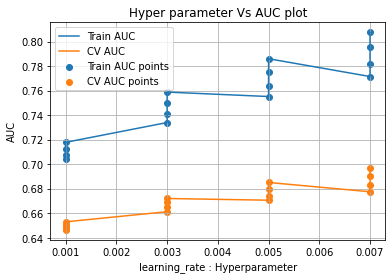

{'learning_rate': 0.007, 'n_estimators': 180}
0.6969168472344599


In [35]:
results_set1 = pd.DataFrame.from_dict(clf.cv_results_)
results_set1 = results_set1.sort_values(['param_learning_rate'])

train_auc= results_set1['mean_train_score']
train_auc_std= results_set1['std_train_score']
cv_auc = results_set1['mean_test_score'] 
cv_auc_std= results_set1['std_test_score']
learning_rate =  results_set1['param_learning_rate']

plt.plot(learning_rate, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(learning_rate, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(learning_rate, train_auc, label='Train AUC points')
plt.scatter(learning_rate, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("learning_rate : Hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

print(clf.best_params_)
print(clf.best_score_)

Using Set 2

In [36]:
clf_2 = GridSearchCV(estimator= LGBM, param_grid= param_distribution, cv=3, scoring='roc_auc', return_train_score=True, n_jobs=-1)
clf_2.fit(X_tr_set2, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.003, 0.005, 0.007],
                        

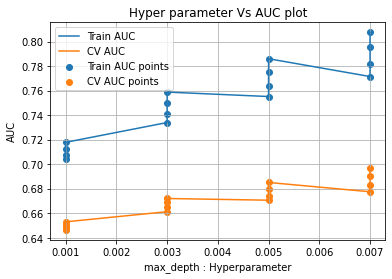

{'learning_rate': 0.007, 'n_estimators': 180}
0.6910232972613072


In [37]:
results_set2 = pd.DataFrame.from_dict(clf_2.cv_results_)
results_set2 = results_set1.sort_values(['param_learning_rate'])

train_auc= results_set2['mean_train_score']
train_auc_std= results_set2['std_train_score']
cv_auc = results_set2['mean_test_score'] 
cv_auc_std= results_set2['std_test_score']
learning_rate =  results_set2['param_learning_rate']

plt.plot(learning_rate, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(learning_rate, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(learning_rate, train_auc, label='Train AUC points')
plt.scatter(learning_rate, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("max_depth : Hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

print(clf_2.best_params_)
print(clf_2.best_score_)



<h2>3 Representation of results<h2>

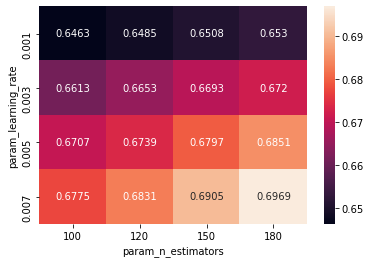

In [38]:
# reference for making heatmap: https://stackoverflow.com/questions/56302647/how-to-plot-a-heatmap-and-find-best-hyperparameter-for-decision-tree-after-grids

import seaborn as sns
max_auc_set1 = results_set1.groupby(['param_learning_rate', 'param_n_estimators']).max()
max_auc_set1 = max_auc_set1.unstack()[['mean_test_score', 'mean_train_score']]
sns.heatmap(max_auc_set1.mean_test_score, annot=True, fmt='.4g')


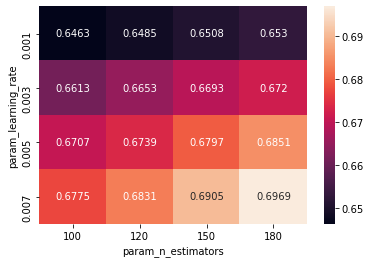

In [39]:
max_auc_set2 = results_set2.groupby(['param_learning_rate', 'param_n_estimators']).max()
max_auc_set2 = max_auc_set2.unstack()[['mean_test_score', 'mean_train_score']]
sns.heatmap(max_auc_set1.mean_test_score, annot=True, fmt='.4g')

**Model testing on the best hyperparameters**

We got the best hyperparameter from the hyperparameter tunning in which we have 
used the gridsearch which gave the best value of learning_rate as 0.007 and n_estimator as 180.

For Set 1 

In [40]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [50]:
best_learning_rate = 0.007
best_n_estimators = 180

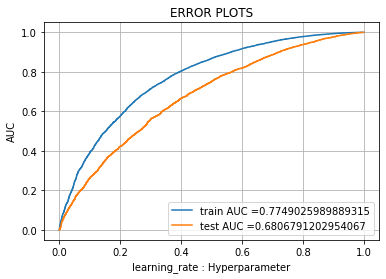

In [51]:
from sklearn.metrics import roc_curve, auc

LGBM_set1 = LGBMClassifier(learning_rate=best_learning_rate, n_estimators=best_n_estimators)
LGBM_set1.fit(X_tr_set1, y_train)

y_train_pred_set1 = batch_predict(LGBM_set1, X_tr_set1)    
y_test_pred_set1 = batch_predict(LGBM_set1, X_te_set1)

train_fpr_set1, train_tpr_set1, tr_thresholds_set1 = roc_curve(y_train, y_train_pred_set1)
test_fpr_set1, test_tpr_set1, te_thresholds_set1 = roc_curve(y_test, y_test_pred_set1)

plt.plot(train_fpr_set1, train_tpr_set1, label="train AUC ="+str(auc(train_fpr_set1, train_tpr_set1)))
plt.plot(test_fpr_set1, test_tpr_set1, label="test AUC ="+str(auc(test_fpr_set1, test_tpr_set1)))
plt.legend()
plt.xlabel("learning_rate : Hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()


For Set 2

In [52]:
best_learning_rate_2 = 0.007
best_n_estimators_2 = 180

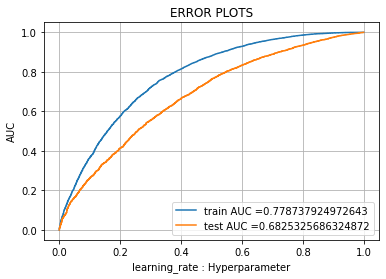

In [53]:
from sklearn.metrics import roc_curve, auc

LGBM_set2 = LGBMClassifier(learning_rate=best_learning_rate, n_estimators=best_n_estimators)
LGBM_set2.fit(X_tr_set2, y_train)

y_train_pred_set2 = batch_predict(LGBM_set2, X_tr_set2)    
y_test_pred_set2 = batch_predict(LGBM_set2, X_te_set2)

train_fpr_set2, train_tpr_set2, tr_thresholds_set2 = roc_curve(y_train, y_train_pred_set2)
test_fpr_set2, test_tpr_set2, te_thresholds_set2 = roc_curve(y_test, y_test_pred_set2)

plt.plot(train_fpr_set2, train_tpr_set2, label="train AUC ="+str(auc(train_fpr_set2, train_tpr_set2)))
plt.plot(test_fpr_set2, test_tpr_set2, label="test AUC ="+str(auc(test_fpr_set2, test_tpr_set2)))
plt.legend()
plt.xlabel("learning_rate : Hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()


In [54]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

Now we will make the confusion matrix for the train and test.

Creating confusion matrix for SET1

the maximum value of tpr*(1-fpr) 0.500732167549912 for threshold 0.833


[Text(409.4117647058824, 0.5, 'True'),
 Text(0.5, 24.0, 'Pred'),
 Text(0.5, 1.0, 'test confusion matrix for Set1')]

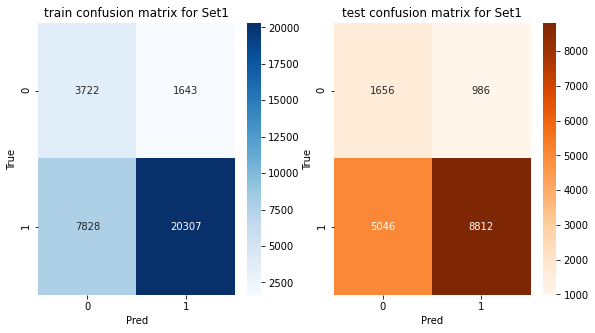

In [89]:
print("="*100)
import seaborn as sns
import matplotlib.pyplot as plt  
from sklearn.metrics import confusion_matrix

best_t = find_best_threshold(tr_thresholds_set1, train_fpr_set1, train_tpr_set1)

plt.figure(figsize=(15,5))
plt.subplot(131) 
#train confusion matrix
train_confusion_matric_set1 =confusion_matrix(y_train, predict_with_best_t(y_train_pred_set1, best_t))
sns.heatmap(train_confusion_matric_set1, annot=True,fmt="d",cmap='Blues').set(title='train confusion matrix for Set1',xlabel='Pred',ylabel='True')

plt.subplot(132) 
#test confusion matrix
test_confusion_matrix_set1 = confusion_matrix(y_test, predict_with_best_t(y_test_pred_set1, best_t))
sns.heatmap(test_confusion_matrix_set1, annot=True,fmt="d",cmap='Oranges').set(title='test confusion matrix for Set1',xlabel='Pred',ylabel='True')


the maximum value of tpr*(1-fpr) 0.5080149942752051 for threshold 0.828


[Text(409.4117647058824, 0.5, 'True'),
 Text(0.5, 24.0, 'Pred'),
 Text(0.5, 1.0, 'test confusion matrix for Set2')]

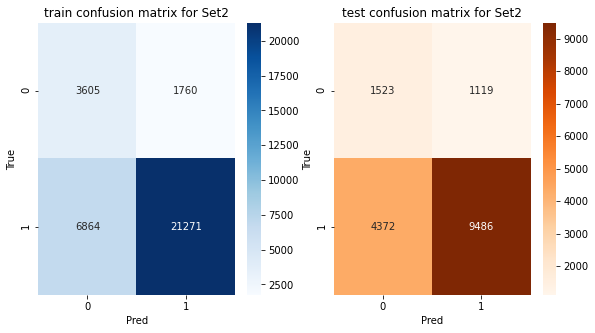

In [91]:
print("="*100)

best_t_2 = find_best_threshold(tr_thresholds_set2, train_fpr_set2, train_tpr_set2)

plt.figure(figsize=(15,5))
plt.subplot(131) 
#train confusion matrix
train_confusion_matric_set2 =confusion_matrix(y_train, predict_with_best_t(y_train_pred_set2, best_t_2))
sns.heatmap(train_confusion_matric_set2, annot=True,fmt="d",cmap='Blues').set(title='train confusion matrix for Set2',xlabel='Pred',ylabel='True')

plt.subplot(132) 
#test confusion matrix
test_confusion_matrix_set2 = confusion_matrix(y_test, predict_with_best_t(y_test_pred_set2, best_t_2))
sns.heatmap(test_confusion_matrix_set2, annot=True,fmt="d",cmap='Oranges').set(title='test confusion matrix for Set2',xlabel='Pred',ylabel='True')


<h1>3. Summary</h1>

<br> as mentioned in the step 4 of instructions

In [92]:
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ['Vectorizer','Model','learning_rate','n_estimators','Train AUC','Test AUC']
table.add_row(['TFIDF','LightGBM',0.007,180,0.774,0.680])
table.add_row(['TFIDF W2V','LightGBM',0.007,180,0.778,0.682])
print(table)

+------------+----------+---------------+--------------+-----------+----------+
| Vectorizer |  Model   | learning_rate | n_estimators | Train AUC | Test AUC |
+------------+----------+---------------+--------------+-----------+----------+
|   TFIDF    | LightGBM |     0.007     |     180      |   0.774   |   0.68   |
| TFIDF W2V  | LightGBM |     0.007     |     180      |   0.778   |  0.682   |
+------------+----------+---------------+--------------+-----------+----------+
